## Data Analysis for Physics and Astronomy
## Sommersemster 2025 
# Assignment 2

Due: **10:00 27. May 2025**

Discussion: **12:00 27. May 2025**

**Online submission** at via github classroom  

# Import and understand scientific data [30 Points]

Describe each of the following file types, then load and visualize the corresponding file's contents.

In [3]:
%matplotlib inline

**a.** FITS: Open and visualise the data in `Data/CII_O1.fits`. **10 points**

The important package is from the astropy libary: [DOCUMENTATION](https://docs.astropy.org/en/stable/io/fits/)

Every Header Data Unit (HDU) normally has two components: header and data. In astropy these two components are accessed through the two attributes of the HDU, `hdu.header` and `hdu.data`.

What is important to know is that the data contained in the HDU has the shape of the givin axes, but it is not specifically those values. For this FITS file, we have Intensity values for axes of 'Frequency', 'RA', 'DEC', and 'Stokes'. The units of the intensity data is given by `BUNIT`: Kelvin. This is typical for radio observational data. The axes can be rebuilt using `CRVAL`, `CRPIX`  and `CDELT` for each axis, and the axes must be linearly-spaced. The units of these axes must be inferred in this case, but typically comments are left for anything that is abnormal. You can find a description of the heder labels [here](https://diffractionlimited.com/help/maximdl/FITS_File_Header_Definitions.htm).

Since axes 2, 3, and 4 have length 1, we can simplify our data to two dimensions: frequency and intensity. One super confusing thing about extracting the data (at least I find it super confusing) is that the axes in the extracted numpy array are reversed compared to the header. This is due to the difference between how axezs are defined in numpy and in the HDU standard. So to access the first axis in the data you would have to use something like `hdul[0].data[0,0,0,:]`.

Now you just need to plot the data and you are done.

First print the header info.

In [4]:
# Benötigte Bibliotheken installieren
%pip install numpy matplotlib astropy pyhdf h5py pandas

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import pprint

# FITS-Datei öffnen
filename = "Data/CII_01.fits"
hdul = fits.open("Data/CII_01.fits")

# Header anzeigen
print("Header-Informationen:")
pprint.pprint(hdul[0].header)

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Header-Informationen:
SIMPLE  =                    T         /                                        
BITPIX  =                   32         /                                        
NAXIS   =                    4         /                                        
NAXIS1  =                  196         /                                        
NAXIS2  =                    1         /                                        
NAXIS3  =                    1         /                                        
NAXIS4  =                    1         /                                        
BLOCKED =                    T         /                                        
BLANK   =           2147483647         / Blanking value                  

Then access the spectrum data. The `.data` attribute of a table HDU contains the data of the table.

The x axis is frequency as written in the header. Calculate the frequency axis from the header value by using the formula $(i-(crpix1-1))*cdelt1+crval1$

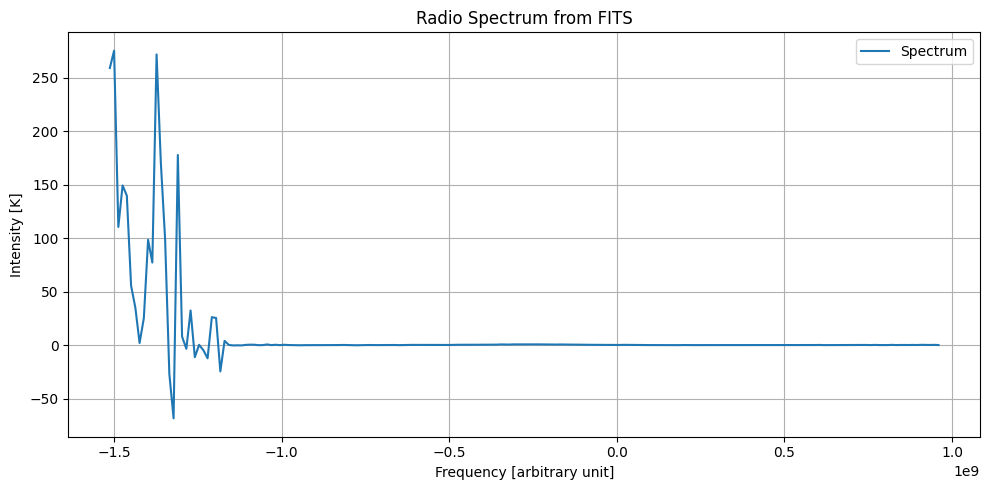

In [11]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# FITS-Datei öffnen
filename = "Data/CII_01.fits"
with fits.open(filename) as hdul:
    hdu = hdul[0]
    header = hdu.header
    data = hdu.data

    # Intensitätsdaten extrahieren (angenommen: [Stokes, DEC, RA, Freq])
    intensity = data[0, 0, 0, :]  # 1D-Spektrum entlang Frequenz

    # Headerwerte auslesen
    crval1 = header['CRVAL1']  # Startfrequenz
    cdelt1 = header['CDELT1']  # Frequenzschritt
    crpix1 = header['CRPIX1']  # Referenzpixel (1-basiert)

    # Frequenzachse berechnen mit der gewünschten Formel:
    # f(i) = (i - (crpix1 - 1)) * cdelt1 + crval1
    num_points = intensity.shape[0]
    i = np.arange(num_points)
    frequency = (i - (crpix1 - 1)) * cdelt1 + crval1

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(frequency, intensity, label="Spectrum")
    plt.xlabel(f"Frequency [{header.get('CUNIT1', 'arbitrary unit')}]")
    plt.ylabel(f"Intensity [{header.get('BUNIT', 'unknown')}]")
    plt.title("Radio Spectrum from FITS")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


Plot the spectrum. Use the frequency values as x-value. Determine the correct Units for the y-axis.

b. HDF4: Open and visualise the data in 2006001-2006005.s0454pfrt-bsst.hdf. 10 points

You can use pyhdf to obtain extract the HDF4 data. This particular file contains a dictionary with three data objects: one for the two axes, and another containing the data. The axes thus do not need to be rebuilt as with the FITS standard.

Verfügbare Datasets: ['bsst', 'lat', 'lon']
Datenform: (4096, 8192)
Achse 1 Länge: 4096, Achse 2 Länge: 8192


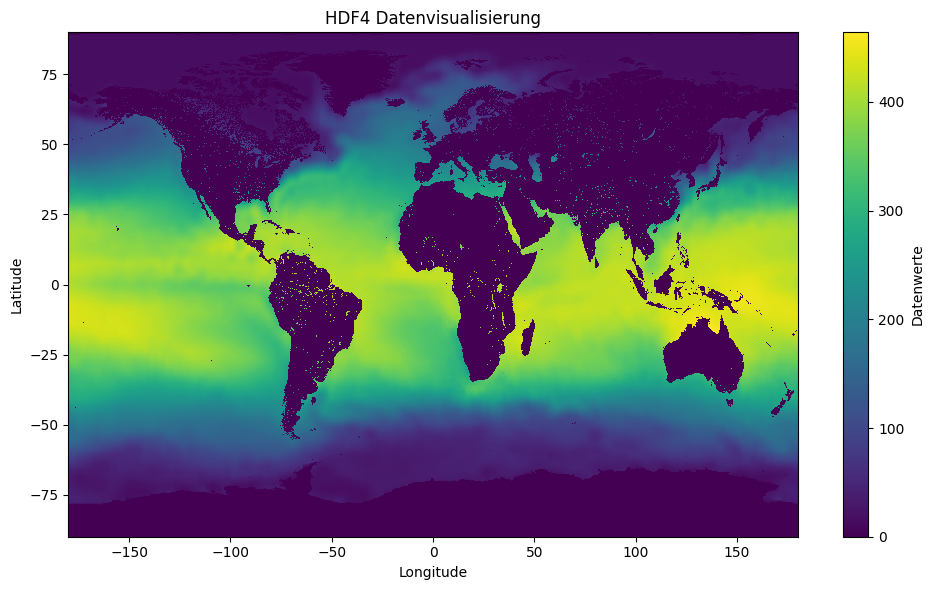

In [1]:
#from pyhdf.SD import *
#import matplotlib.pyplot as plt
#import pprint
#file = SD("Data/2006001-2006005.s0454pfrt-bsst.hdf", SDC.READ)

#dataset = file.datasets()

# here your code
from pyhdf.SD import SD, SDC
import matplotlib.pyplot as plt
import numpy as np
import pprint

# HDF4-Datei öffnen

hdf = SD("Data/2006001-2006005.s0454pfrt-bsst.hdf", SDC.READ)

# Alle verfügbaren Datasets auflisten
datasets = hdf.datasets()
print("Verfügbare Datasets:", list(datasets.keys()))

# Zugriff auf die tatsächlichen Datensätze
data = hdf.select('bsst')[:]
axis1 = hdf.select('lat')[:]
axis2 = hdf.select('lon')[:]

# Form prüfen
print(f"Datenform: {data.shape}")
print(f"Achse 1 Länge: {len(axis1)}, Achse 2 Länge: {len(axis2)}")

# 2D-Daten visualisieren (z. B. als Heatmap)
plt.figure(figsize=(10, 6))
# pcolormesh expects X and Y to be 2D meshgrids or 1D arrays for bin edges.
# For 1D arrays, their lengths must be one greater than the corresponding dimension of C if using 'flat' shading.
# Here, we use the centers, so we need to pass axis2 (x) and axis1 (y) as 1D arrays, but swap their order for correct orientation.
plt.pcolormesh(axis2, axis1, data, shading='auto', cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('HDF4 Datenvisualisierung')
plt.colorbar(label='Datenwerte')
plt.tight_layout()
plt.show()


**c.** HDF5: Open and visualise the data in `3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5`. **10 points**

It is worth noting that `pandas` also contains HDF5 functionality, but it is specifically for `pandas` dataframes. It cannot read standard HDF5 files. We instead have to use `h5py`.

In [4]:
import h5py

hdffilename = "Data/3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5"
hdf_file = h5py.File(hdffilename,'r')

To see the top-level meta data,

In [5]:
topmeta=hdf_file['/']
print(topmeta.attrs.keys())

<KeysViewHDF5 ['FileHeader', 'FileInfo']>


In [6]:
fileheader = topmeta.attrs.__getitem__('FileHeader')
print(fileheader.decode('UTF-8'))

DOI=10.5067/GPM/IMERG/3B-HH/05;
DOIauthority=http://dx.doi.org/;
DOIshortName=3IMERGHH;
AlgorithmID=3IMERGHH;
AlgorithmVersion=3IMERGH_1.0;
FileName=3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5;
SatelliteName=MULTI;
InstrumentName=MERGED;
GenerationDateTime=2017-11-18T17:02:13.000Z;
StartGranuleDateTime=2014-10-01T09:00:00.000Z;
StopGranuleDateTime=2014-10-01T09:29:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=HALF_HOUR;
ProcessingSystem=PPS;
ProductVersion=V05B;
EmptyGranule=NOT_EMPTY;
MissingData=;



In [7]:
fileinfo = topmeta.attrs.__getitem__('FileInfo')
print(fileinfo.decode('UTF-8'))

DataFormatVersion=cn;
TKCodeBuildVersion=3;
MetadataVersion=cv;
FormatPackage=HDF5-1.8.9;
BlueprintFilename=GPM.V1.3IMERGHH.blueprint.xml;
BlueprintVersion=BV_58;
TKIOVersion=3.80.33;
MetadataStyle=PVL;
EndianType=LITTLE_ENDIAN;



How can we get an overview of the structure?

In [8]:
print(list(hdf_file.keys()))

['Grid']


But this does not show the whole tree structures.

In [9]:
def PrintDataset(name, obj):
    if isinstance(obj,h5py.Dataset):
        print(name)
        print('\t',obj)
hdf_file.visititems(PrintDataset)

Grid/HQobservationTime
	 <HDF5 dataset "HQobservationTime": shape (3600, 1800), type "<i2">
Grid/HQprecipSource
	 <HDF5 dataset "HQprecipSource": shape (3600, 1800), type "<i2">
Grid/HQprecipitation
	 <HDF5 dataset "HQprecipitation": shape (3600, 1800), type "<f4">
Grid/IRkalmanFilterWeight
	 <HDF5 dataset "IRkalmanFilterWeight": shape (3600, 1800), type "<i2">
Grid/IRprecipitation
	 <HDF5 dataset "IRprecipitation": shape (3600, 1800), type "<f4">
Grid/lat
	 <HDF5 dataset "lat": shape (1800,), type "<f4">
Grid/lon
	 <HDF5 dataset "lon": shape (3600,), type "<f4">
Grid/precipitationCal
	 <HDF5 dataset "precipitationCal": shape (3600, 1800), type "<f4">
Grid/precipitationQualityIndex
	 <HDF5 dataset "precipitationQualityIndex": shape (3600, 1800), type "<f4">
Grid/precipitationUncal
	 <HDF5 dataset "precipitationUncal": shape (3600, 1800), type "<f4">
Grid/probabilityLiquidPrecipitation
	 <HDF5 dataset "probabilityLiquidPrecipitation": shape (3600, 1800), type "<i2">
Grid/randomError
	 <

There is a bunch of different data contained in this file. We will examine one of these - 'HQobservationTime' - in more detail.

In [10]:
meta=hdf_file['Grid/lon']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

meta=hdf_file['Grid/lat']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

meta=hdf_file['Grid/HQobservationTime']
print(meta.attrs.keys())

fileinfo = meta.attrs.__getitem__('DimensionNames')
print(fileinfo.decode('UTF-8'))
fileinfo = meta.attrs.__getitem__('units')
print(fileinfo.decode('UTF-8'))
fileinfo = meta.attrs.__getitem__('Units')
print(fileinfo.decode('UTF-8'))

<KeysViewHDF5 ['DimensionNames', 'Units', 'units', 'standard_name', 'CLASS', 'REFERENCE_LIST']>
degrees_east
<KeysViewHDF5 ['DimensionNames', 'Units', 'units', 'standard_name', 'CLASS', 'REFERENCE_LIST']>
degrees_north
<KeysViewHDF5 ['DimensionNames', 'Units', 'units', 'coordinates', '_FillValue', 'CodeMissingValue', 'DIMENSION_LIST']>
lon,lat
minutes
minutes


In [11]:
hdf_file.close()

It would be useful if we can store the contents into pandas dataframe.

In [12]:
import pandas as pd
import numpy as np

def get_df_from_hdf(hdffilename,datasets):
    header = {'filename':hdffilename}

    with h5py.File(hdffilename,'r') as f:
        for colname, dataset in datasets.items():
            ds = f[dataset]
            header[colname] = [ds[()]]

    df = pd.DataFrame(header)
    return df

datasets = {'lat':'Grid/lat', 'lon':'Grid/lon', 'HQobservationTime':'Grid/HQobservationTime'}
df = get_df_from_hdf(hdffilename,datasets)
print(df)

                                            filename  \
0  Data/3B-HHR.MS.MRG.3IMERG.20141001-S090000-E09...   

                                                 lat  \
0  [-89.95, -89.85, -89.75, -89.65, -89.55, -89.4...   

                                                 lon  \
0  [-179.95, -179.85, -179.75, -179.65, -179.55, ...   

                                   HQobservationTime  
0  [[-9999, -9999, -9999, -9999, -9999, -9999, -9...  


Visualize the data 'HQobservationTime' as a function of the latitute 'lat' and longitude 'lon'.

lat shape: (1800,)
lon shape: (3600,)
HQobservationTime shape: (3600, 1800)


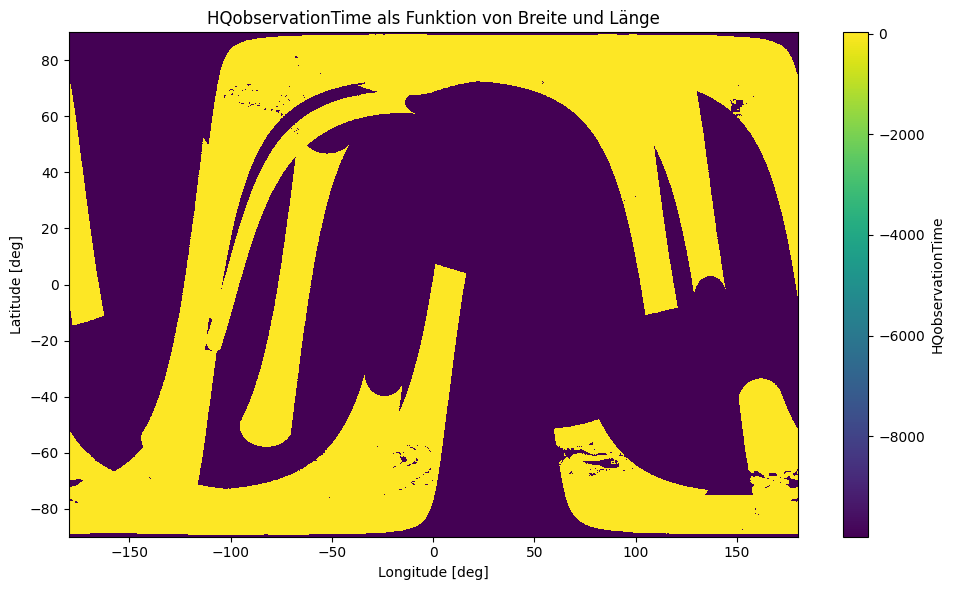

In [2]:
# your code goes here

import h5py
import numpy as np
import matplotlib.pyplot as plt

# Datei öffnen
hdffilename = "Data/3B-HHR.MS.MRG.3IMERG.20141001-S090000-E092959.0540.V05B.HDF5"
with h5py.File(hdffilename, 'r') as hdf_file:
    # Lese die relevanten Datensätze
    lat = hdf_file['Grid/lat'][:]
    lon = hdf_file['Grid/lon'][:]
    hq_obs_time = hdf_file['Grid/HQobservationTime'][:]

    # Prüfe die Formen
    print("lat shape:", lat.shape)
    print("lon shape:", lon.shape)
    print("HQobservationTime shape:", hq_obs_time.shape)

    # Erstelle ein 2D-Plot (z.B. als Heatmap)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(lon, lat, hq_obs_time.T, shading='auto', cmap='viridis')
    plt.xlabel('Longitude [deg]')
    plt.ylabel('Latitude [deg]')
    plt.title('HQobservationTime als Funktion von Breite und Länge')
    plt.colorbar(label='HQobservationTime')
    plt.tight_layout()
    plt.show()

# 2. Averaging spectral radio data (DATA EXERCISE) [30 Points]

In this exercise you will work on a data set of artificial radio observation `radio-map.fits`. It is a map of 5x5
spectra with 201 measured frequency/velocity channels (channel width is unity). If you number all spectra
from 1 to 25 we use the following scheme to assign spectra to positions on the map (spectrum 1 is the top
left spectrum):

In [14]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pprint

In [15]:
m = fits.open("Data/radio-map.fits")
pprint.pprint(m[0].header)
spectra = m[0].data

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -64 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  201 / length of data axis 1                          
NAXIS2  =                    5 / length of data axis 2                          
NAXIS3  =                    5 / length of data axis 3                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                   0. / scaling offset                                 
BSCALE  =                   1. / scaling offset                                 
AUTHOR  = 'Created with the Wolfram Language : www.wolfram.com' / Software      
DATE    = '2018-04-20T09:11:

**a.** Compute the total “integrated-intensity” map of the observations, i.e. integrate the spectra over the full spectral range for all positions and plot the 5x5 map in a suitable way. **5 Points**

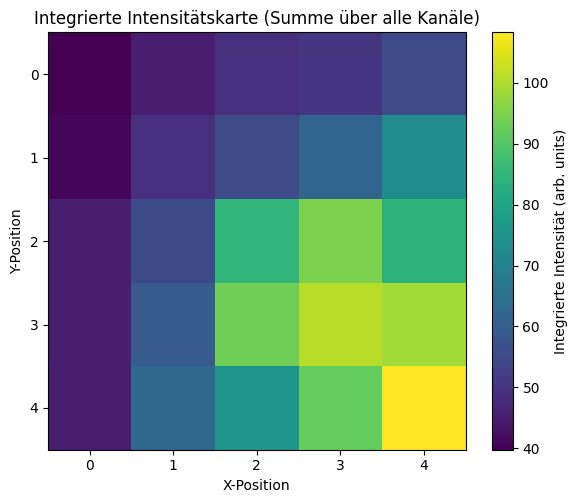

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# FITS-Datei laden
m = fits.open("Data/radio-map.fits")
spectra = m[0].data  # shape: (5, 5, 201)

# Über die Frequenzachse (letzte Achse) integrieren
integrated_map = np.sum(spectra, axis=2)  # shape: (5, 5)

# Plot der integrierten Intensitätskarte
plt.figure(figsize=(6, 5))
im = plt.imshow(integrated_map, origin='upper', cmap='viridis')
plt.title("Integrierte Intensitätskarte (Summe über alle Kanäle)")
plt.xlabel("X-Position")
plt.ylabel("Y-Position")
plt.colorbar(im, label="Integrierte Intensität (arb. units)")
plt.tight_layout()
plt.show()

**b.** Compute two channel maps by integrating over the frequency channels 50-100 and 100-150. Compare the two maps. **5 Points**

Original shape: (5, 5, 201)


/tmp/ipykernel_774/1535971555.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  map1 = np.trapz(data[50:100, :, :], axis=0)  # Kanäle 50–99
/tmp/ipykernel_774/1535971555.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  map2 = np.trapz(data[100:150, :, :], axis=0)  # Kanäle 100–149


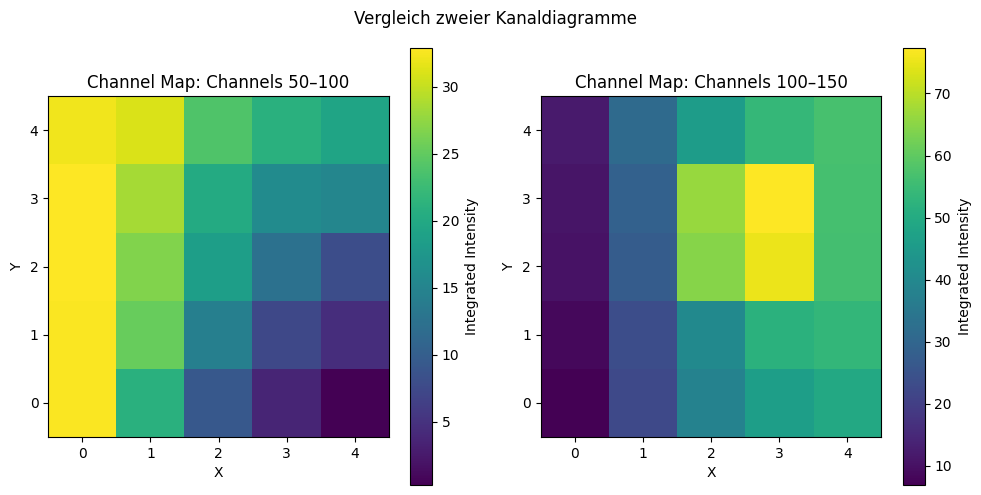

In [19]:
# enter your code
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# === 1. Lade die FITS-Datei ===
filename = "Data/radio-map.fits"  # <--- ändere das auf deinen Dateinamen
with fits.open(filename) as hdul:
    data = hdul[0].data
    header = hdul[0].header

# === 2. Form überprüfen ===
# Erwartet: (spectral, y, x). Falls nicht, umsortieren
print(f"Original shape: {data.shape}")
if data.shape[0] == 5 and data.shape[1] == 5:
    data = np.moveaxis(data, -1, 0)  # Umstellen auf (spectral, y, x)

# === 3. Definiere Kanäle ===
# Bereich beachten: numpy slicing ist exklusiv am Ende!
map1 = np.trapz(data[50:100, :, :], axis=0)  # Kanäle 50–99
map2 = np.trapz(data[100:150, :, :], axis=0)  # Kanäle 100–149

# === 4. Visualisierung ===
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

im1 = axs[0].imshow(map1, origin="lower", cmap="viridis")
axs[0].set_title("Channel Map: Channels 50–100")
plt.colorbar(im1, ax=axs[0], label="Integrated Intensity")

im2 = axs[1].imshow(map2, origin="lower", cmap="viridis")
axs[1].set_title("Channel Map: Channels 100–150")
plt.colorbar(im2, ax=axs[1], label="Integrated Intensity")

for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")

plt.suptitle("Vergleich zweier Kanaldiagramme")
plt.tight_layout()
plt.show()


**c.** Compute the average spectrum, by averaging all 25 positions. **5 Points**

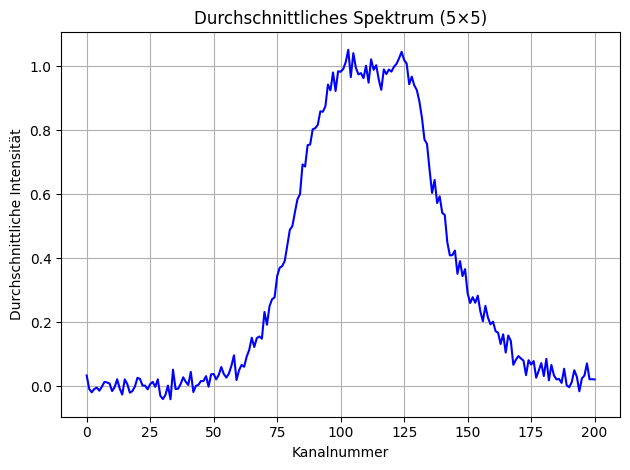

In [22]:
# enter your code
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# === 1. FITS-Datei laden ===
filename = "Data/radio-map.fits"  # <-- Ersetze durch deinen Dateinamen
with fits.open(filename) as hdul:
    data = hdul[0].data

# === 2. Falls nötig: Achsen sortieren (soll: [spektrum, y, x]) ===
if data.shape[0] == 5 and data.shape[1] == 5:
    data = np.moveaxis(data, -1, 0)

# === 3. Durchschnittliches Spektrum über alle 25 Positionen ===
avg_spectrum = np.mean(data, axis=(1, 2))  # Mittelwert über y und x

# === 4. Plotten ===
plt.plot(avg_spectrum, color='blue')
plt.title("Durchschnittliches Spektrum (5×5)")
plt.xlabel("Kanalnummer")
plt.ylabel("Durchschnittliche Intensität")
plt.grid(True)
plt.tight_layout()
plt.show()


**d.** Plot every spectrum and overlay the average spectrum. Describe how the emission changes across the map. In particular how the line center position, the peak height and the line widths behave. **15 Points**

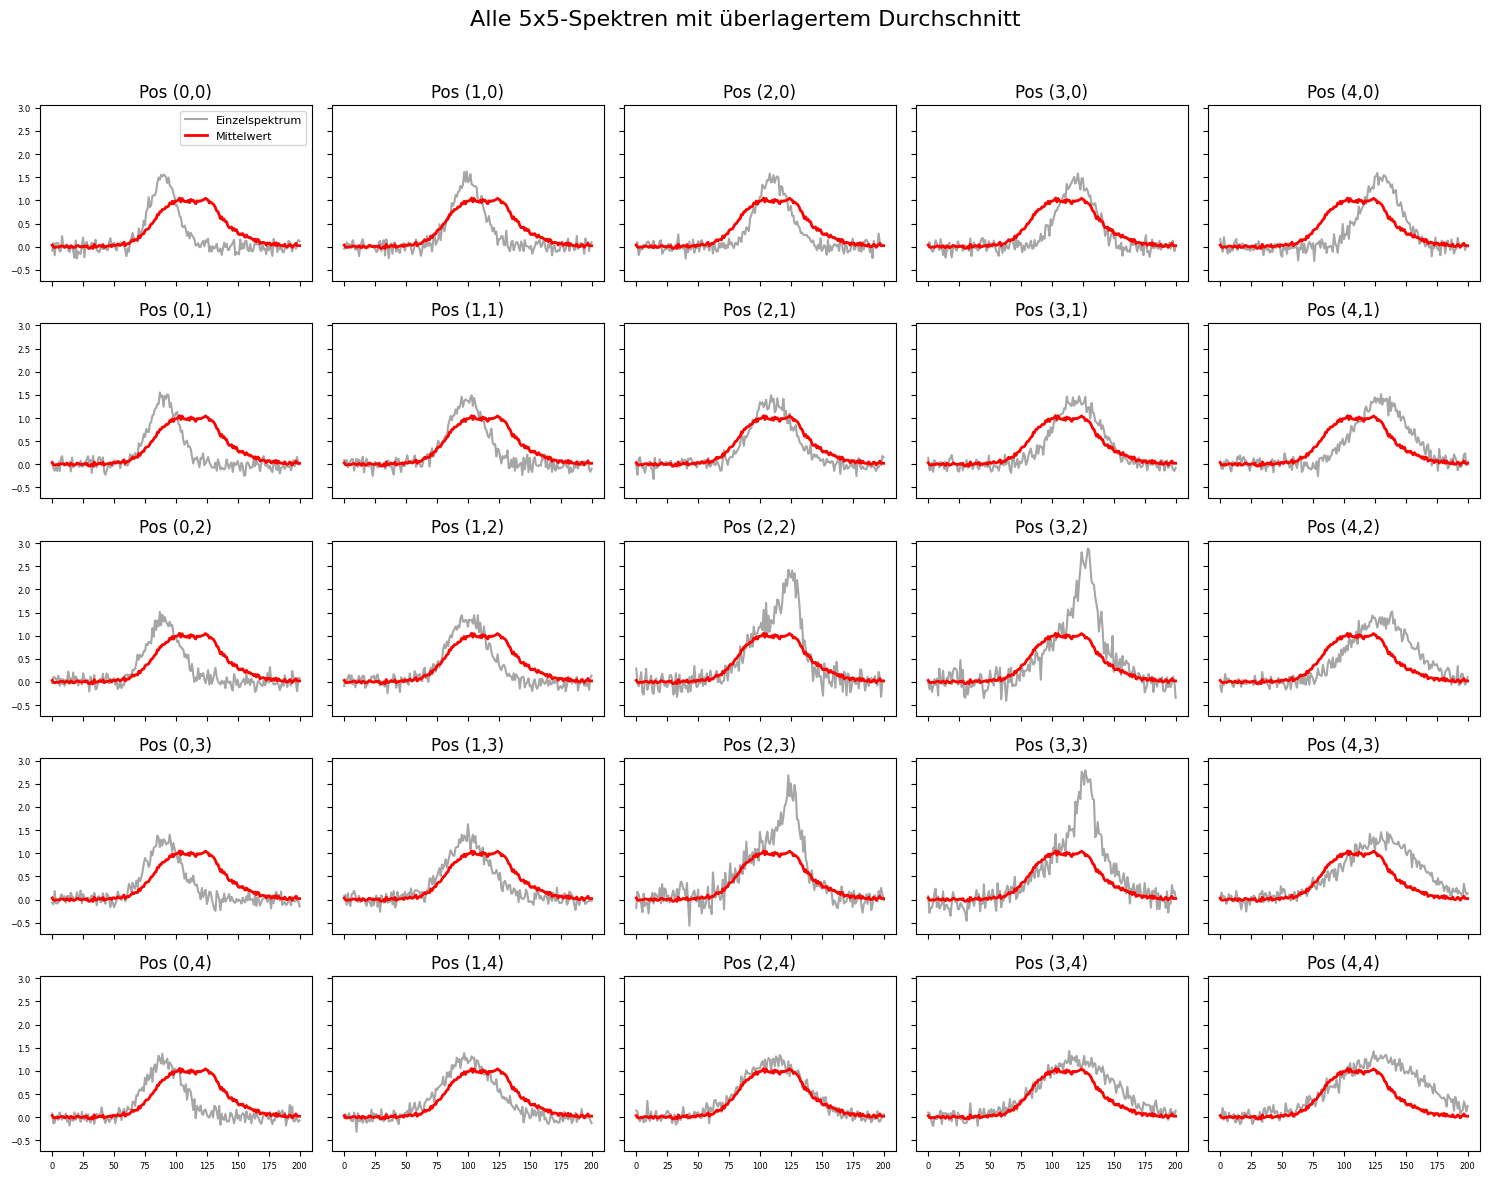

In [24]:
# enter your code
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# === 1. Lade FITS-Datei ===
filename = "Data/radio-map.fits"  # <-- Dateiname hier eintragen
with fits.open(filename) as hdul:
    data = hdul[0].data

# === 2. Achsen ggf. korrigieren ===
if data.shape[0] == 5 and data.shape[1] == 5:
    data = np.moveaxis(data, -1, 0)  # jetzt: (channels, y, x)

n_chan, ny, nx = data.shape

# === 3. Durchschnittliches Spektrum berechnen ===
avg_spectrum = np.mean(data, axis=(1, 2))

# === 4. Alle Spektren + Durchschnitt plotten ===
fig, axs = plt.subplots(ny, nx, figsize=(15, 12), sharex=True, sharey=True)

for y in range(ny):
    for x in range(nx):
        ax = axs[y, x]
        spectrum = data[:, y, x]
        ax.plot(spectrum, color='gray', alpha=0.7, label='Einzelspektrum')
        ax.plot(avg_spectrum, color='red', linewidth=2, label='Mittelwert' if (y == 0 and x == 0) else "")
        ax.set_title(f"Pos ({x},{y})")
        ax.tick_params(labelsize=6)

# Legende nur einmal
axs[0, 0].legend(fontsize=8)
fig.suptitle("Alle 5x5-Spektren mit überlagertem Durchschnitt", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
